In [ ]:
#38-48 from: https://git.arts.ac.uk/tbroad/AI-4-Media-22-23/blob/main/Week%203.1%20Convolutional%20Neural%20Networks/Week%203.1%20image%20classification%20from%20scratch.ipynb
#49 from: https://keras-cn.readthedocs.io/en/latest/legacy/blog/image_classification_using_very_little_data/#_1
#59,62 form: https://keras.io/guides/transfer_learning/#using-random-data-augmentation

Found 929 files belonging to 6 classes.
Using 744 files for training.
Found 929 files belonging to 6 classes.
Using 185 files for validation.


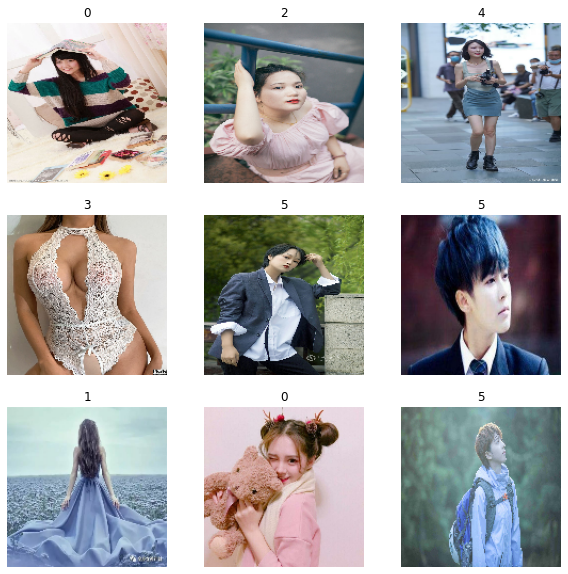

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

image_size = (150, 150)
batch_size = 128
num_classes = 2
dataset_path = '/Users/yangyifei/Desktop/dataset/train'

train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

validation = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [39]:
base_model = keras.applications.MobileNetV3Small(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [40]:
base_model.trainable = False

In [41]:
inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
if num_classes == 2:
    outputs = keras.layers.Dense(1)(x)
else:
    outputs = keras.layers.Dense(num_classes)(x)
model = keras.Model(inputs, outputs)

In [48]:
epochs = 20
if num_classes == 5:
    loss_function = "binary_crossentropy"
else:
    loss_function = "categorical_crossentropy"

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss_function,
    metrics=["accuracy"],
)
model.fit(
    train,
    epochs=epochs,
    validation_data=validation,
)

Epoch 1/20
6/6 [==============================] - 9s 791ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 2/20
6/6 [==============================] - 7s 697ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 3/20
6/6 [==============================] - 7s 703ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 4/20
6/6 [==============================] - 7s 707ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 5/20
6/6 [==============================] - 7s 719ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 6/20
6/6 [==============================] - 7s 711ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss: 3.2928e-07 - val_accuracy: 0.1892
Epoch 7/20
6/6 [==============================] - 7s 711ms/step - loss: 3.1357e-07 - accuracy: 0.1586 - val_loss

In [50]:
#model.save('classifer_imgae.model')  报错，无法保存模型

INFO:tensorflow:Assets written to: classifer_imganation.model/assets


/Users/yangyifei/anaconda3/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [49]:
#Using random data augmentation_method1

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    
        rotation_range=40,#是一个0~180的度数，用来指定随机选择图片的角度。
    
        width_shift_range=0.2,#width_shift和height_shift用来指定水平和竖直方向随机移动的程度，这是两个0~1之间的比例。
    
        height_shift_range=0.2,
    
        shear_range=0.2,#用来进行剪切变换的程度，参考剪切变换
    
        zoom_range=0.2,#用来进行随机的放大
    
        horizontal_flip=True,#随机的对图片进行水平翻转，这个参数适用于水平翻转不影响图片语义的时候
    
        fill_mode='nearest')#用来指定当需要进行像素填充，如旋转，水平和竖直位移时，如何填充新出现的像素

img = load_img('/Users/yangyifei/Desktop/dataset/train/cute women/cute_women130.jpeg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='woman', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

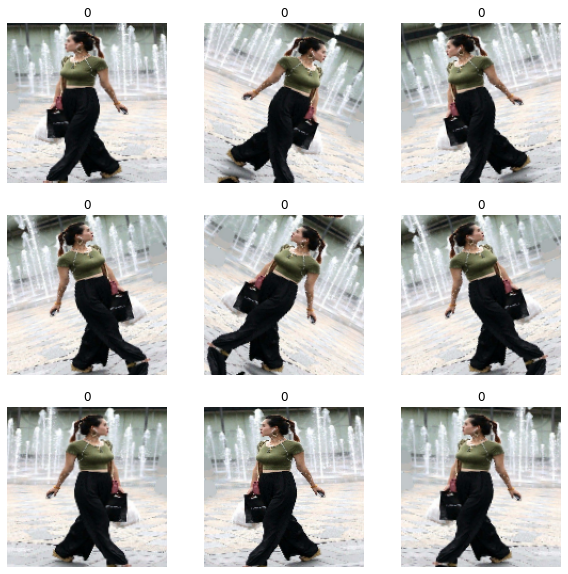

In [59]:
#Using random data augmentation_method2

from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

import numpy as np

for images, labels in train.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[1]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [62]:
#Build a better modle based on the random data

base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049

In [66]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train, epochs=epochs, validation_data=validation)

Epoch 1/20
6/6 [==============================] - 22s 3s/step - loss: -1.7448 - binary_accuracy: 0.1573 - val_loss: -5.8672 - val_binary_accuracy: 0.1892
Epoch 2/20
6/6 [==============================] - 20s 3s/step - loss: -7.3723 - binary_accuracy: 0.1573 - val_loss: -11.7007 - val_binary_accuracy: 0.1892
Epoch 3/20
6/6 [==============================] - 20s 3s/step - loss: -12.3679 - binary_accuracy: 0.1573 - val_loss: -17.4642 - val_binary_accuracy: 0.1892
Epoch 4/20
6/6 [==============================] - 19s 3s/step - loss: -17.3198 - binary_accuracy: 0.1573 - val_loss: -23.2179 - val_binary_accuracy: 0.1892
Epoch 5/20
6/6 [==============================] - 20s 3s/step - loss: -22.7735 - binary_accuracy: 0.1573 - val_loss: -28.9556 - val_binary_accuracy: 0.1892
Epoch 6/20
6/6 [==============================] - 21s 3s/step - loss: -27.7535 - binary_accuracy: 0.1573 - val_loss: -34.7105 - val_binary_accuracy: 0.1892
Epoch 7/20
6/6 [==============================] - 21s 3s/step - los

In [ ]:
#Do a round of fine-tuning of the entire model

base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 20
model.fit(train, epochs=epochs, validation_data=validation)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2049